## 딥러닝

### 심층신경망

In [1]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기때문에 다시 다운로드 하지 않음

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [5]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [6]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [7]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


##### 심층신경망 만들기1

In [8]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [9]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [10]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [12]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 1s 759us/step - loss: 0.4703 - accuracy: 0.8359
Epoch 2/100
1500/1500 [==============================] - 1s 681us/step - loss: 0.3583 - accuracy: 0.8708
Epoch 3/100
1500/1500 [==============================] - 1s 691us/step - loss: 0.3221 - accuracy: 0.8848
Epoch 4/100
1500/1500 [==============================] - 1s 703us/step - loss: 0.2962 - accuracy: 0.8939
Epoch 5/100
1500/1500 [==============================] - 1s 725us/step - loss: 0.2772 - accuracy: 0.9006
Epoch 6/100
1500/1500 [==============================] - 1s 750us/step - loss: 0.2599 - accuracy: 0.9070
Epoch 7/100
1500/1500 [==============================] - 1s 750us/step - loss: 0.2450 - accuracy: 0.9120
Epoch 8/100
1500/1500 [==============================] - 1s 738us/step - loss: 0.2318 - accuracy: 0.9178
Epoch 9/100
1500/1500 [==============================] - 1s 730us/step - loss: 0.2202 - accuracy: 0.9220
Epoch 10/100
1500/1500 [=============================

In [15]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 591us/step - loss: 0.8667 - accuracy: 0.8755


[0.866679847240448, 0.8755000233650208]

In [16]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 494us/step


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [19]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [20]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

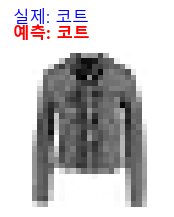

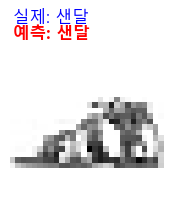

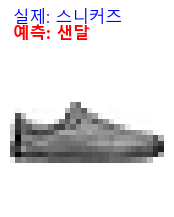

In [21]:
for i in range(10,13):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [22]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [23]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [26]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [27]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 702us/step - loss: 0.5245 - accuracy: 0.8154
Epoch 2/20
1500/1500 [==============================] - 1s 700us/step - loss: 0.3946 - accuracy: 0.8582
Epoch 3/20
1500/1500 [==============================] - 1s 676us/step - loss: 0.3549 - accuracy: 0.8728
Epoch 4/20
1500/1500 [==============================] - 1s 709us/step - loss: 0.3306 - accuracy: 0.8808
Epoch 5/20
1500/1500 [==============================] - 1s 742us/step - loss: 0.3153 - accuracy: 0.8880
Epoch 6/20
1500/1500 [==============================] - 1s 690us/step - loss: 0.3034 - accuracy: 0.8904
Epoch 7/20
1500/1500 [==============================] - 1s 746us/step - loss: 0.2940 - accuracy: 0.8955
Epoch 8/20
1500/1500 [==============================] - 1s 735us/step - loss: 0.2838 - accuracy: 0.8990
Epoch 9/20
1500/1500 [==============================] - 1s 694us/step - loss: 0.2765 - accuracy: 0.9016
Epoch 10/20
1500/1500 [==============================] - 1s 720u

In [29]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 534us/step - loss: 0.4198 - accuracy: 0.8842


[0.41984498500823975, 0.8842499852180481]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [30]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [31]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [32]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 778us/step - loss: 0.5261 - accuracy: 0.8157
Epoch 2/20
1500/1500 [==============================] - 1s 764us/step - loss: 0.3972 - accuracy: 0.8578
Epoch 3/20
1500/1500 [==============================] - 1s 722us/step - loss: 0.3554 - accuracy: 0.8718
Epoch 4/20
1500/1500 [==============================] - 1s 730us/step - loss: 0.3261 - accuracy: 0.8813
Epoch 5/20
1500/1500 [==============================] - 1s 727us/step - loss: 0.3066 - accuracy: 0.8851
Epoch 6/20
1500/1500 [==============================] - 1s 726us/step - loss: 0.2899 - accuracy: 0.8934
Epoch 7/20
1500/1500 [==============================] - 1s 723us/step - loss: 0.2771 - accuracy: 0.8972
Epoch 8/20
1500/1500 [==============================] - 1s 737us/step - loss: 0.2656 - accuracy: 0.9010
Epoch 9/20
1500/1500 [==============================] - 1s 722us/step - loss: 0.2558 - accuracy: 0.9054
Epoch 10/20
1500/1500 [==============================] - 1s 722u

- optimizer 사용시 0.01정도 개선

In [33]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7정도 차이

375/375 [==============================] - 0s 569us/step - loss: 0.3509 - accuracy: 0.8846


[0.35086390376091003, 0.8845833539962769]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림. 

In [34]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [35]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# 모델4 설정, 최적화는 adam클래스만 사용할 것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [37]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 775us/step - loss: 0.5873 - accuracy: 0.7936
Epoch 2/20
1500/1500 [==============================] - 1s 782us/step - loss: 0.4370 - accuracy: 0.8428
Epoch 3/20
1500/1500 [==============================] - 1s 754us/step - loss: 0.4037 - accuracy: 0.8524
Epoch 4/20
1500/1500 [==============================] - 1s 771us/step - loss: 0.3824 - accuracy: 0.8606
Epoch 5/20
1500/1500 [==============================] - 1s 773us/step - loss: 0.3665 - accuracy: 0.8662
Epoch 6/20
1500/1500 [==============================] - 1s 762us/step - loss: 0.3550 - accuracy: 0.8707
Epoch 7/20
1500/1500 [==============================] - 1s 776us/step - loss: 0.3444 - accuracy: 0.8739
Epoch 8/20
1500/1500 [==============================] - 1s 756us/step - loss: 0.3350 - accuracy: 0.8765
Epoch 9/20
1500/1500 [==============================] - 1s 763us/step - loss: 0.3265 - accuracy: 0.8797
Epoch 10/20
1500/1500 [==============================] - 1s 769u

In [38]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 540us/step - loss: 0.3101 - accuracy: 0.8891


[0.3101227879524231, 0.8890833258628845]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터 만 저장하는 두가지 방법이 존재

In [39]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [40]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\IOT_STUDY\GitHub\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야 


In [41]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'), 
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [42]:
model5.load_weights('./model4-weight.h5')

In [43]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten5 (Flatten)          (None, 784)               0         
                                                                 
 hidden5 (Dense)             (None, 100)               78500     
                                                                 
 dropout5 (Dropout)          (None, 100)               0         
                                                                 
 output5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 632us/step


- 모델까지 전부 생성해주는 방법

In [45]:
model6 = keras.models.load_model('./model4-whole.h5')

In [46]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 562us/step - loss: 0.3417 - accuracy: 0.8815


[0.34169480204582214, 0.8815000057220459]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용.

In [48]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [49]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [50]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [51]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopp_cb])

Epoch 1/20
1500/1500 [==============================] - 2s 979us/step - loss: 0.5876 - accuracy: 0.7911 - val_loss: 0.4224 - val_accuracy: 0.8473
Epoch 2/20
1500/1500 [==============================] - 1s 911us/step - loss: 0.4378 - accuracy: 0.8422 - val_loss: 0.3857 - val_accuracy: 0.8596
Epoch 3/20
1500/1500 [==============================] - 1s 888us/step - loss: 0.4042 - accuracy: 0.8522 - val_loss: 0.3633 - val_accuracy: 0.8659
Epoch 4/20
1500/1500 [==============================] - 1s 915us/step - loss: 0.3811 - accuracy: 0.8613 - val_loss: 0.3626 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 1s 903us/step - loss: 0.3621 - accuracy: 0.8668 - val_loss: 0.3385 - val_accuracy: 0.8753
Epoch 6/20
1500/1500 [==============================] - 1s 933us/step - loss: 0.3511 - accuracy: 0.8708 - val_loss: 0.3540 - val_accuracy: 0.8692
Epoch 7/20
1500/1500 [==============================] - 1s 900us/step - loss: 0.3388 - accuracy: 0.8746 - val_loss: 0.3396 -

In [52]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 535us/step - loss: 0.3385 - accuracy: 0.8753


[0.33854788541793823, 0.875333309173584]

In [53]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 558us/step - loss: 0.3674 - accuracy: 0.8700


[0.3674261271953583, 0.8700000047683716]

In [54]:
early_stopp_cb.stopped_epoch

6

- 20번중 15번반복에서 조기종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSprop...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서 
- `콜백` : 에포크마다 모델 저장 또는 조기종료 를 위해서 훈련 도중에 다른 기능을 수행하는 것